In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_index = pd.read_csv("economic_index.csv")

In [7]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
# drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [9]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [10]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

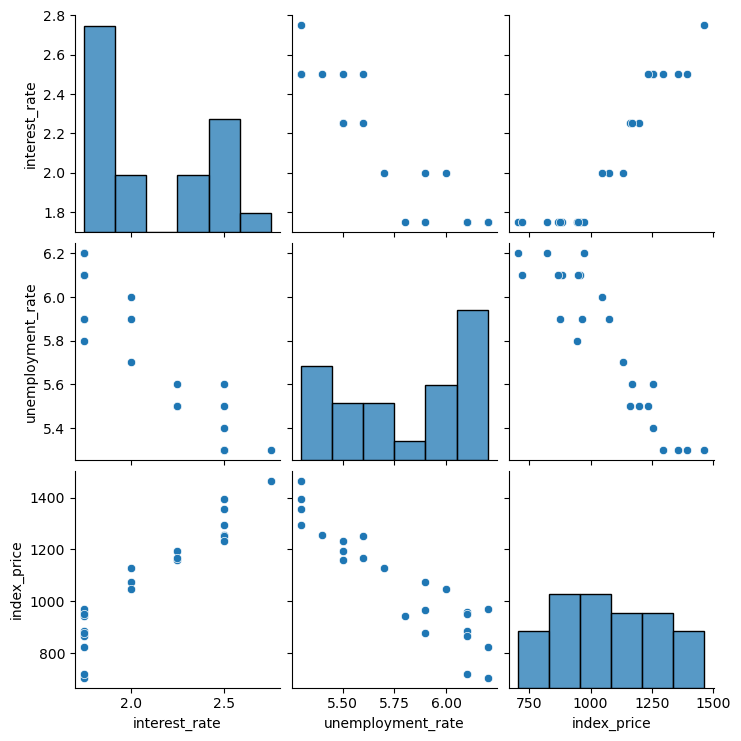

In [11]:
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


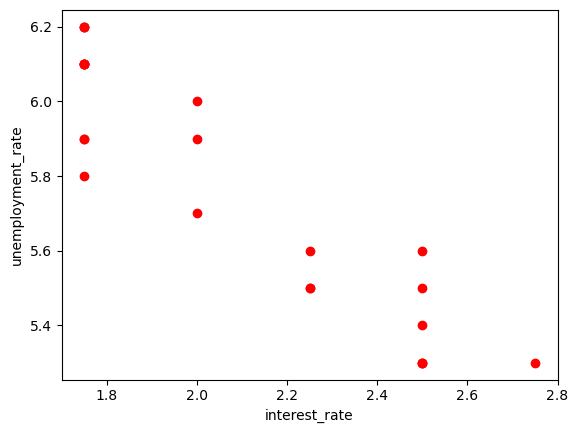

In [13]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [14]:
## independent and dependent feature
X = df_index.iloc[:,:-1]
Y = df_index.iloc[:,-1]

In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [18]:
import seaborn as sns

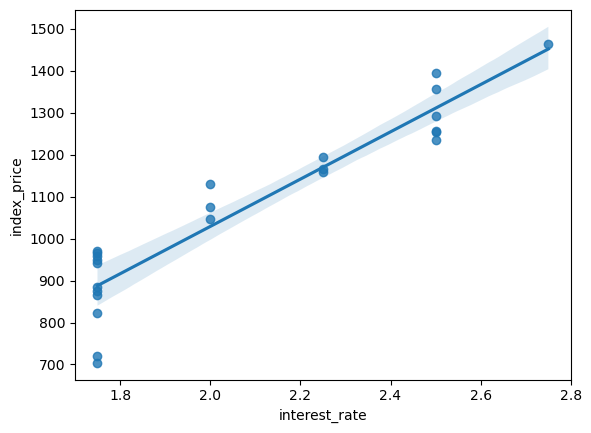

In [19]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()

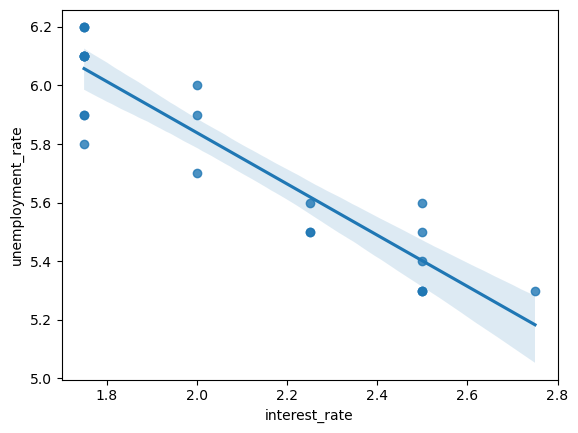

In [20]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [25]:
regression.fit(X_train,Y_train)

LinearRegression()

In [26]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',
cv = 3)

In [27]:
np.mean(validation_score)

-5914.828180162396

In [28]:
## prediction
Y_pred = regression.predict(X_test)

In [29]:
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [30]:
## Performance Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [32]:
from sklearn.metrics import r2_score

In [33]:
score = r2_score(Y_test,Y_pred)
print(score)

0.7591371539010254


In [34]:
1- (1-score)*(len(Y_test) - 1)/(len(Y_test) - X_test.shape[1] -1)

0.5985619231683756

## Assumptions

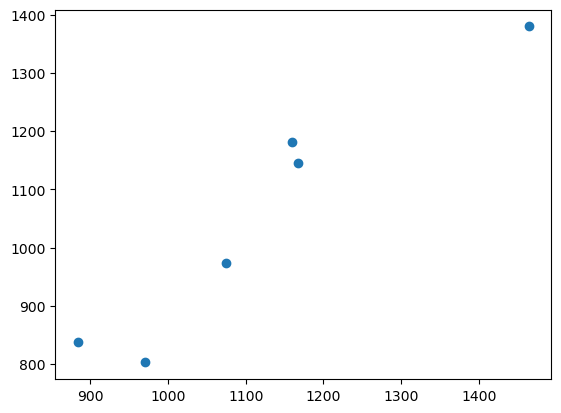

In [35]:
plt.scatter(Y_test,Y_pred)
plt.show()

In [36]:
residuals = Y_test-Y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

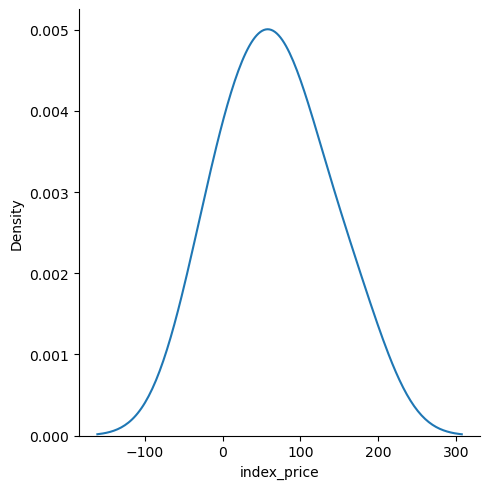

In [37]:
sns.displot(residuals,kind='kde')
plt.show()

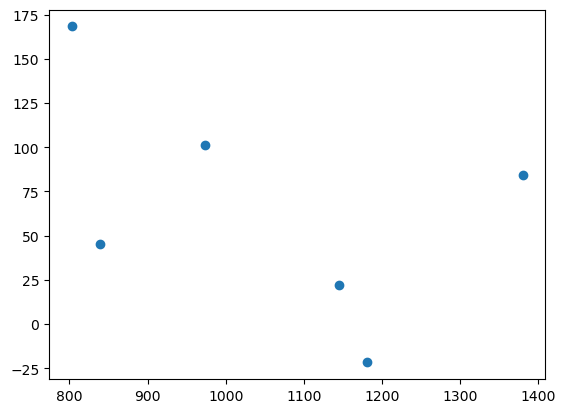

In [38]:
plt.scatter(Y_pred,residuals)
plt.show()

In [39]:
## OLS Linear Regression
import statsmodels.api as sm

In [40]:
model = sm.OLS(Y_train,X_train).fit()

In [41]:
prediction = model.predict(X_test)
prediction

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [42]:
model.summary()

c:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 12 Feb 2026   Prob (F-statistic):                       0.754
Time:                        22:27:59   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Pickling

* Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does it that it "Serialises" the object first before writing it to file. Pickling is a way to convert a python object(list,dict,ect.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in python script.

In [43]:
import pickle
pickle.dump(regression,open('regressor.pkl','wb'))

In [44]:
model = pickle.load(open('regressor.pkl','rb'))

In [46]:
model.predict(X_test)

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])